In [66]:
import pandas as pd
import numpy as np
import io
import re
import matplotlib.pyplot as plt

In [161]:
#читаем данные из .csv файла
with io.open('test/test data.csv', 'rt', newline='') as f:
    lines = f.readlines()
    
lines[:5]

['Week,Date,Event_Count,FederalDistrict_Name,Event_Name\r\n',
 '"18,2018-05-01 00:00:00,117,Central,""Регистрация пользователя"""\r\n',
 '"18,2018-05-01 00:00:00,1,Far Eastern,""Регистрация пользователя"""\r\n',
 '"18,2018-05-01 00:00:00,10,North Caucasian,""Регистрация пользователя"""\r\n',
 '"18,2018-05-01 00:00:00,20,Northwestern,""Регистрация пользователя"""\r\n']

In [162]:
#избавляемся от лишних символов
new_lines = []

for line in lines:
    line = line.replace("\r\n",'')
    line = line.replace('"','')
    new_lines.append(line.split(','))

In [69]:
#создаем датафрейм
df = pd.DataFrame(new_lines[1:], columns =new_lines[0])


#приводим данные к нужному типу
df['Date'] = pd.to_datetime(df['Date'])
df['Week'] = df['Week'].map(int)
df['Event_Count'] = df['Event_Count'].map(int)

print(df.shape)
df.head()

(663, 5)


,Week,Date,Event_Count,FederalDistrict_Name,Event_Name
0,18,2018-05-01,117,Central,Регистрация пользователя
1,18,2018-05-01,1,Far Eastern,Регистрация пользователя
2,18,2018-05-01,10,North Caucasian,Регистрация пользователя
3,18,2018-05-01,20,Northwestern,Регистрация пользователя
4,18,2018-05-01,5,Siberian,Регистрация пользователя


In [70]:
#смотрим уникальные значения во всех столбцах, чтобы понимать с чем работать
for col in df.columns:
    print(col,' ',df[col].unique(), '\n')

Week   [18 19 20 21 22 23] 

Date   ['2018-05-01T00:00:00.000000000' '2018-05-02T00:00:00.000000000'
 '2018-05-03T00:00:00.000000000' '2018-05-04T00:00:00.000000000'
 '2018-05-05T00:00:00.000000000' '2018-05-06T00:00:00.000000000'
 '2018-05-07T00:00:00.000000000' '2018-05-08T00:00:00.000000000'
 '2018-05-09T00:00:00.000000000' '2018-05-10T00:00:00.000000000'
 '2018-05-11T00:00:00.000000000' '2018-05-12T00:00:00.000000000'
 '2018-05-13T00:00:00.000000000' '2018-05-14T00:00:00.000000000'
 '2018-05-15T00:00:00.000000000' '2018-05-16T00:00:00.000000000'
 '2018-05-17T00:00:00.000000000' '2018-05-18T00:00:00.000000000'
 '2018-05-19T00:00:00.000000000' '2018-05-20T00:00:00.000000000'
 '2018-05-21T00:00:00.000000000' '2018-05-22T00:00:00.000000000'
 '2018-05-23T00:00:00.000000000' '2018-05-24T00:00:00.000000000'
 '2018-05-25T00:00:00.000000000' '2018-05-26T00:00:00.000000000'
 '2018-05-27T00:00:00.000000000' '2018-05-28T00:00:00.000000000'
 '2018-05-29T00:00:00.000000000' '2018-05-30T00:00:00.

In [72]:
#создаем массив датафреймов с кол-во операций в неделю по отдельным регионам
reg_list = []

for region in df.FederalDistrict_Name.unique():
    df_newnew = df[df.FederalDistrict_Name == region].groupby('Week').Event_Count.sum().reset_index()
    reg_list.append(df_newnew)

reg_list[0].head()    

,Week,Event_Count
0,18,1086
1,19,2667
2,20,6189
3,21,7907
4,22,7770


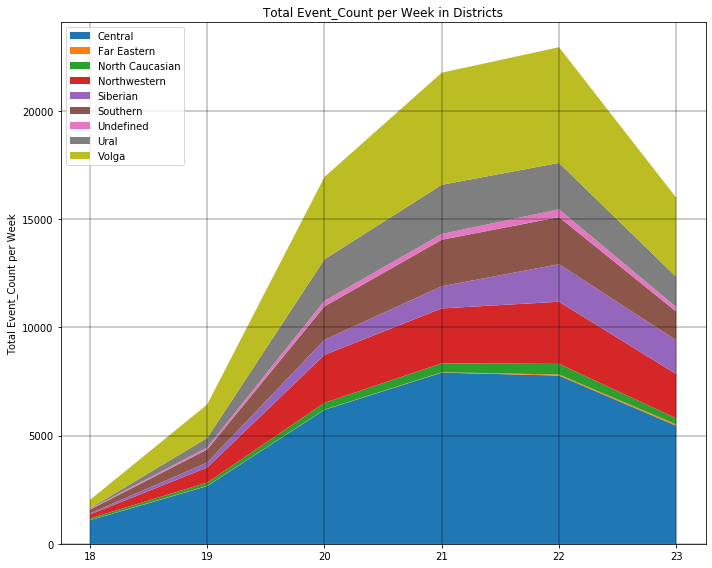

In [175]:
#график1
fig, ax = plt.subplots(figsize=(10, 8))
ax.stackplot(df.Week.unique(), [dff.Event_Count for dff in reg_list], labels=df.FederalDistrict_Name.unique())
ax.set_title('Total Event_Count per Week in Districts')
ax.legend(loc='upper left')
ax.set_ylabel('Total Event_Count per Week')
plt.grid(color='black', linestyle='-', linewidth=0.4)
fig.tight_layout()

#сохраняем график
plt.savefig('graphs/gr1.png', bbox_inches='tight')

plt.show()

In [74]:
#создаем массив датафреймов с кол-во операций за каждый день по отдельным регионам
reg_listt = []

for district in df.FederalDistrict_Name.unique():
    df_dates = pd.DataFrame()
    
    for week in df.Week.unique():
        new_df = (df[df.FederalDistrict_Name == district])[df.Week == week].groupby('Date').Event_Count.sum().reset_index()
        
        new_df['Week'] = [week for i in range(new_df.shape[0])]
        
        df_dates = pd.concat([df_dates, new_df])
    
    reg_listt.append(df_dates)
    
reg_listt[0].head(10)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


,Date,Event_Count,Week
0,2018-05-01,240,18
1,2018-05-02,178,18
2,2018-05-03,192,18
3,2018-05-04,182,18
4,2018-05-05,294,18
0,2018-05-06,268,19
1,2018-05-07,304,19
2,2018-05-08,259,19
3,2018-05-09,338,19
4,2018-05-10,385,19


In [75]:
#по региону Far Eastern не хватает данных по нескольким дням(система не вносила записи с 0 оперций за день)
#заполняем пропущенные строчки нулями
new_df1 = reg_listt[1]

new_df1.set_index("Date")

new_df1 = new_df1.set_index("Date").reindex(reg_listt[0].Date)

new_df1["Event_Count"].fillna(0.0, inplace=True)

reg_listt[1] = new_df1

reg_listt[1].head(10)

,Event_Count,Week
Date,,
2018-05-01,1.0,18.0
2018-05-02,3.0,18.0
2018-05-03,2.0,18.0
2018-05-04,2.0,18.0
2018-05-05,0.0,NaN
2018-05-06,0.0,NaN
2018-05-07,1.0,19.0
2018-05-08,6.0,19.0
2018-05-09,0.0,NaN


In [122]:
#собараем массив дат начал недели для верней оси Х для графика ниже
weekBeginning_list = []

for week_num in reg_listt[0].Week.unique():
    weekBeginning_list.append((reg_listt[0].Week.values == week_num).argmax())

xticss = []

for week_num in weekBeginning_list:
    xticss.append(reg_listt[0].Date.reset_index().loc[week_num][1])
    

print('Дни начала недели\n')
xticss

Дни начала недели



[Timestamp('2018-05-01 00:00:00'),
 Timestamp('2018-05-06 00:00:00'),
 Timestamp('2018-05-13 00:00:00'),
 Timestamp('2018-05-20 00:00:00'),
 Timestamp('2018-05-27 00:00:00'),
 Timestamp('2018-06-03 00:00:00')]

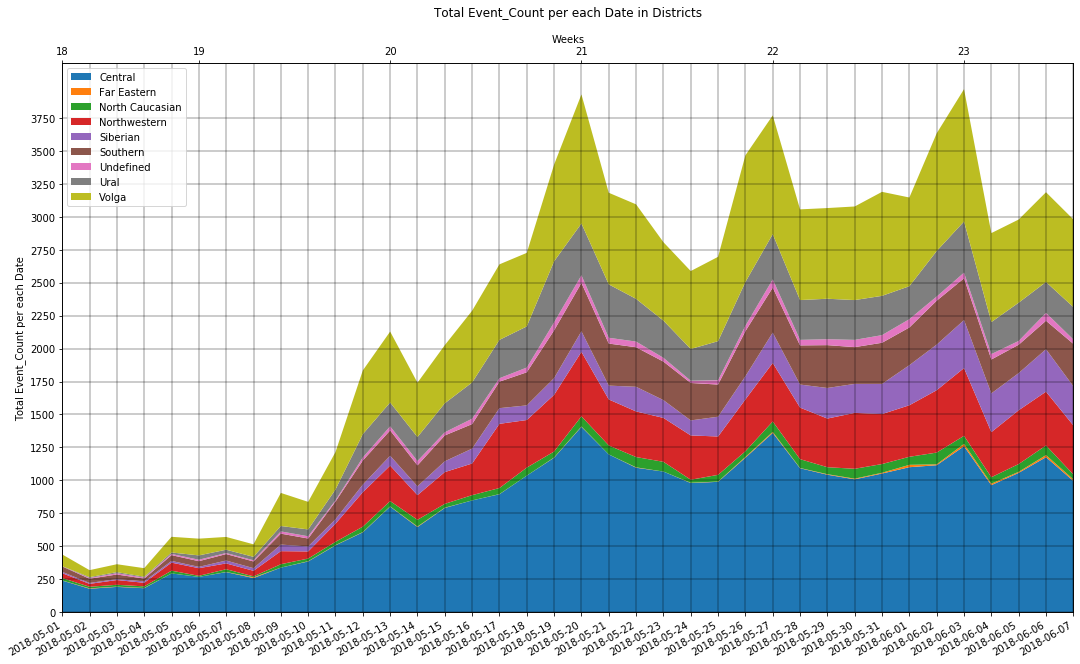

In [176]:
#график2
fig, ax = plt.subplots(figsize=(15, 10))
ax.stackplot(reg_listt[0].Date, [dff.reset_index().Event_Count for dff in reg_listt], 
             labels=df.FederalDistrict_Name.unique())

ax.set_title('Total Event_Count per each Date in Districts')
ax.legend(loc='upper left')
ax.set_ylabel('Total Event_Count per each Date')
plt.grid(color='black', linestyle='-', linewidth=0.4)
plt.xticks(rotation=90)
plt.xticks(reg_listt[0].Date)
plt.yticks(np.arange(0, 4000, 250))
fig.tight_layout()

ax.margins(x=0)

plt.gcf().autofmt_xdate()

ax2 = ax.twiny()
ax2.set_xlabel("\nWeeks")
ax2.set_xlim(reg_listt[0].Date.min(), reg_listt[0].Date.max())
ax2.set_xticks(xticss)
ax2.set_xticklabels(reg_listt[0].Week.unique())

#сохраняем график
plt.savefig('graphs/gr2.png', bbox_inches='tight')
 
plt.show()

In [155]:
#для ответа на вопрос по региональной структуре дистрибьюции построим график кол-во операций/население региона
#заполним массив с кол-вом человек в регионе
people = [39e+6, 8.1e+6, 9.9e+6, 13.9e+6, 19.3e+6, 16.4e+6, 12.3e+6, 17e+6]

In [156]:
#удаляем undefined регион, т.к непонятно вести расчет в его случае
new_list = [dff.reset_index().Event_Count for dff in reg_listt]

del new_list[6]

new_labels = list(df.FederalDistrict_Name.unique())
new_labels.remove('Undefined')

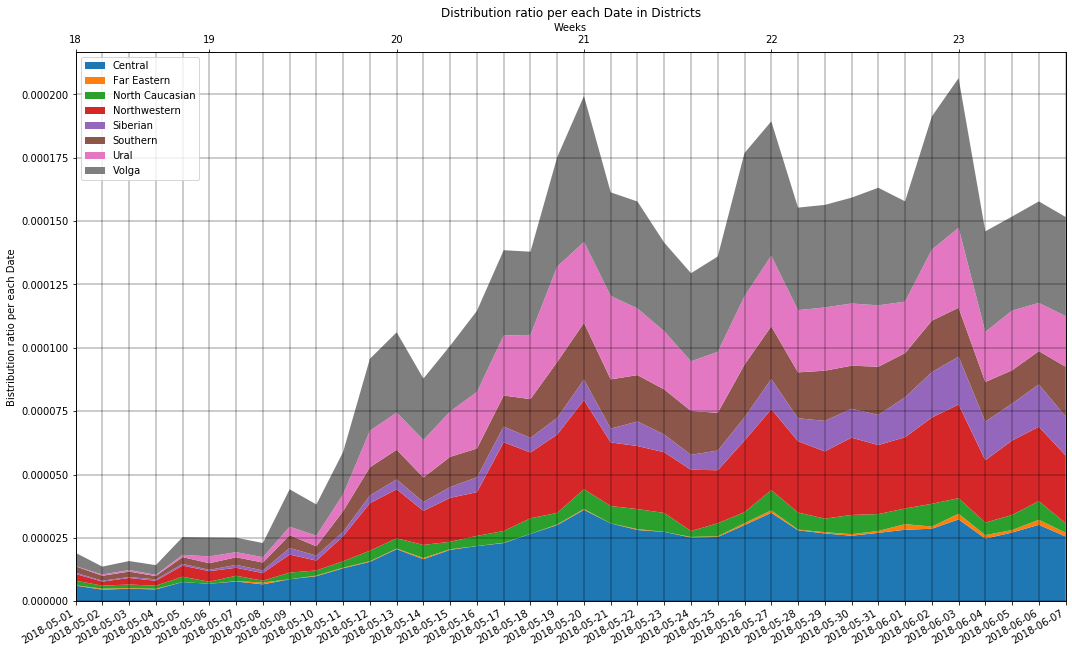

In [173]:
#график3
fig, ax = plt.subplots(figsize=(15, 10))
ax.stackplot(reg_listt[0].Date, [new_list[i]/people[i] for i in range(len(new_list))], 
             labels=new_labels)

ax.set_title('Distribution ratio per each Date in Districts')
ax.legend(loc='upper left')
ax.set_ylabel('Вistribution ratio per each Date')
plt.grid(color='black', linestyle='-', linewidth=0.4)
plt.xticks(rotation=90)
plt.xticks(reg_listt[0].Date)
fig.tight_layout()

ax.margins(x=0)

plt.gcf().autofmt_xdate()

ax2 = ax.twiny()
ax2.set_xlabel("Weeks")
ax2.set_xlim(reg_listt[0].Date.min(), reg_listt[0].Date.max())
ax2.set_xticks(xticss)
ax2.set_xticklabels(reg_listt[0].Week.unique())

#сохраняем график
plt.savefig('graphs/gr3.png', bbox_inches='tight')
 
plt.show()